In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
from sklearn.datasets import load_iris

In [235]:
wb = pd.read_csv("Data/WBnew.csv")
new_column_names = {'2015 [YR2015]': '2015', '2016 [YR2016]': '2016', '2017 [YR2017]': '2017', '2018 [YR2018]': '2018', '2019 [YR2019]': '2019'}
wb1519 = wb.rename(columns=new_column_names)
wb1519 = wb1519.drop(columns=['2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]'])
wb1519.head()

,Country Name,Country Code,Series Name,Series Code,2015,2016,2017,2018,2019
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585
1,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.44,0.45,0.42,0.4,0.38
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.27,62.646,62.406,62.443,62.941
3,Afghanistan,AFG,Net migration,SM.POP.NETM,-286314,-143049,-71491,-36753,9159
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086


In [236]:
wbmelt = pd.melt(wb1519, id_vars=['Country Name','Series Name'], value_vars=['2015', '2016', '2017', '2018', '2019'], var_name='Year', value_name='Value')
wbmelt = wbmelt.dropna()
wbpivot = wbmelt.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value').reset_index()
wbpivot = wbpivot.dropna(axis=1, how='all')
wbpivot.head()

Series Name,Country Name,Year,GDP per capita (current US$),"Hospital beds (per 1,000 people)",Income share held by highest 10%,"Life expectancy at birth, total (years)",Net migration,Real interest rate (%),Researchers in R&D (per million people),Secure Internet servers (per 1 million people)
0,Afghanistan,2015,565.569730408751,0.44,..,62.27,-286314,12.2525481629518,..,2.18729357416894
1,Afghanistan,2016,522.082215583898,0.45,..,62.646,-143049,17.5839381624543,..,12.2764405423167
2,Afghanistan,2017,525.469770891619,0.42,..,62.406,-71491,12.1411782956513,..,44.1873650754779
3,Afghanistan,2018,491.337221382603,0.4,..,62.443,-36753,..,..,53.4795175761047
4,Afghanistan,2019,496.6025042585,0.38,..,62.941,9159,..,..,27.6573503133086


/var/folders/9b/bb7yf3dj4qzbc23czfb1z3rh0000gn/T/ipykernel_90174/3833595271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wbEU['Researchers in R&D (per million people)'] = pd.to_numeric(wbEU['Researchers in R&D (per million people)'])


<Figure size 1000x600 with 0 Axes>

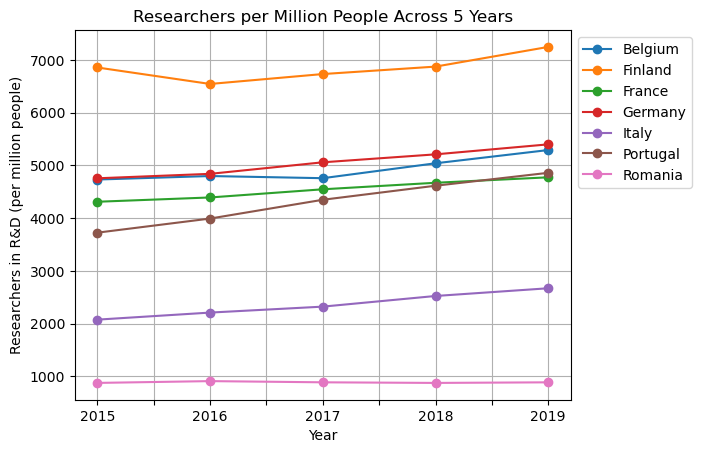

In [237]:
wbEU = wbpivot[wbpivot['Country Name'].isin(['Germany', 'France', 'Italy', 'Romania', 'Portugal', 'Finland', 'Belgium'])]
wbEU['Researchers in R&D (per million people)'] = pd.to_numeric(wbEU['Researchers in R&D (per million people)'])
RDpivot = wbEU.pivot(index='Year', columns='Country Name', values='Researchers in R&D (per million people)')
plt.figure(figsize=(10,6))
RDpivot.plot(marker='o', title="Researchers per Million People Across 5 Years")
plt.xlabel("Year")
plt.ylabel("Researchers in R&D (per million people)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

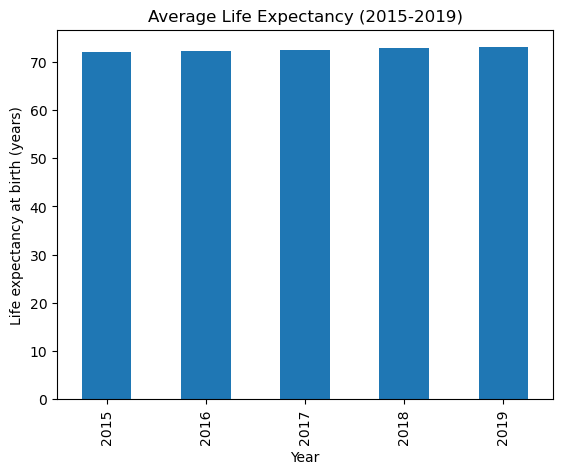

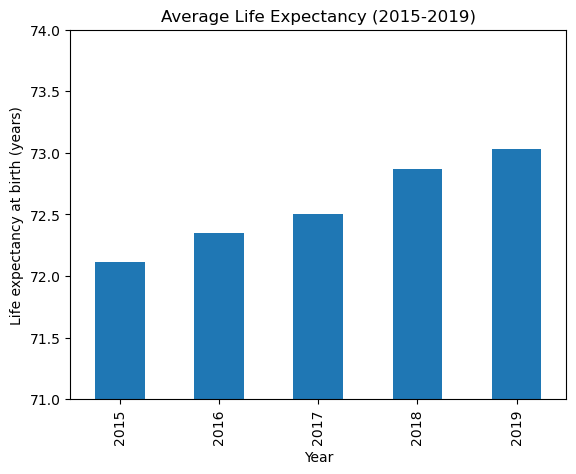

In [238]:
wbpivot['Life expectancy at birth, total (years)'] = pd.to_numeric(wbpivot['Life expectancy at birth, total (years)'])
yravg = wbpivot.groupby("Year")["Life expectancy at birth, total (years)"].mean().reset_index(name="Average Life Expectancy")

yravg.plot(x="Year", y="Average Life Expectancy", kind="bar", title="Average Life Expectancy (2015-2019)", legend=False)
plt.ylabel("Life expectancy at birth (years)")
plt.show()

yravg.plot(x="Year", y="Average Life Expectancy", kind="bar", title="Average Life Expectancy (2015-2019)", legend=False)
plt.ylim(71, 74)
plt.ylabel("Life expectancy at birth (years)")
plt.show()

In [239]:
wbpivot['Hospital beds (per 1,000 people)'] = pd.to_numeric(wbpivot['Hospital beds (per 1,000 people)'], errors='coerce')
healthAgg = wbpivot.groupby("Country Name")[["Life expectancy at birth, total (years)", "Hospital beds (per 1,000 people)"]].mean().reset_index()
alt.Chart(healthAgg).mark_circle().encode(
    x='Hospital beds (per 1,000 people):Q',
    y='Life expectancy at birth, total (years):Q',
    tooltip=['Country Name','Life expectancy at birth, total (years)','Hospital beds (per 1,000 people)']
).interactive().properties(title='Life Expectancy vs Hospital Beds (2015-2019 Average)')

/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [240]:
wbscatter = wbpivot[wbpivot['Year'] == '2015']

alt.Chart(wbscatter).mark_circle().encode(
    x='Income share held by highest 10%:Q',
    y='GDP per capita (current US$):Q',
    tooltip=['Country Name','Year','GDP per capita (current US$)','Income share held by highest 10%']
).interactive().properties(title='GDP per Capita and Income Share of Top 10% in 2015')

/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.10/site-packages/altair/utils/c

alt.Chart(...)